## Plotting dendrograms based on the tree and low dimension coordinates

### The tools utilized

Our plotting of the tree structure is by the R package *dendextend*, which is designed to treat and visualize the data with tree structures. The package will normalize different tree data structures into the dendrogram object.To get the colours used by *dendextend*, R package *colorspace* is also needed.

In [1]:
library(Seurat)
library(dendextend)
library(colorspace)

library(ggplot2)
theme_set(theme_classic())


---------------------
Welcome to dendextend version 1.14.0
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
Or contact: <tal.galili@gmail.com>

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: ‘dendextend’


The following object is masked from ‘package:stats’:

    cutree




In [2]:
## The function to get the default colour bars used in ggplot2
# Thanks to John Colby and zx8754 in the stack overflow community, the function is provided in their answer https://stackoverflow.com/questions/8197559/emulate-ggplot2-default-color-palette.

color.ggplot <- function(n) {
  hues = seq(15, 375, length = n + 1)
  hcl(h = hues, l = 65, c = 100)[1:n]
}

In [3]:
## Building the dendragram object and plot the tree

load("DemoData/datad4objects.Rdata") # it contains two objects: clus.tree, a tree built by HGC; data.d4.seuratobj, the data with the low dimension visualization
clus.dendrogram <- as.dendrogram(clus.tree) # this transformation may spend some time for large-scale data

In [4]:
## Adjusting the height of the tree (Optional)
# When the small branches are too low to visualize, we could adjust the height with some non-linear function.

clus.tree$height = log(clus.tree$height + 1)
clus.tree$height = log(clus.tree$height + 1)
clus.dendrogram <- as.dendrogram(clus.tree)

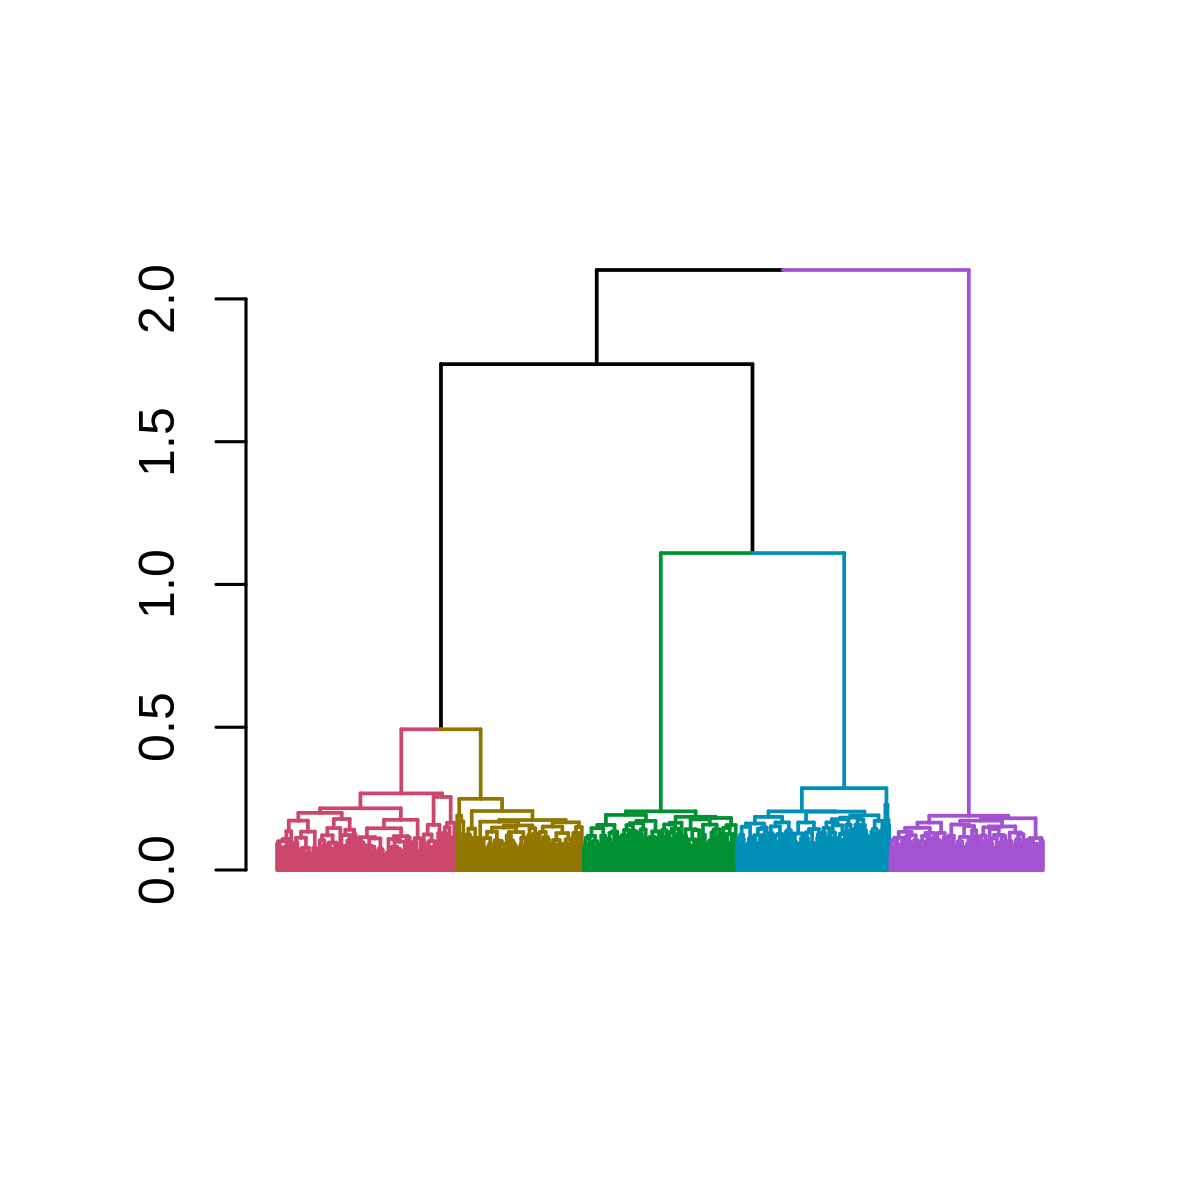

In [5]:
## plot with dendextend

options(repr.plot.width=4, repr.plot.height=4, repr.plot.res = 300)

dend <- clus.dendrogram %>% set("branches_k_color", k=5) %>% set("branches_lwd", 1.2) %>% set("labels_colors", "white")
# set("branches_k_color", k=5): cut the tree in k=5 layer and colour the correspoding branches in the figure.
# set("branches_lwd", 1.2): set the width of the lines
# set("labels_colors", "white"): set the colour of leaves' labels, here we choose white to not show the leaves' names
# The colours of the branches are decided automatically with the function rainbow_hcl.
plot(dend)

circlize version 0.4.11
CRAN page: https://cran.r-project.org/package=circlize
Github page: https://github.com/jokergoo/circlize
Documentation: https://jokergoo.github.io/circlize_book/book/

If you use it in published research, please cite:
Gu, Z. circlize implements and enhances circular visualization
  in R. Bioinformatics 2014.

This message can be suppressed by:
  suppressPackageStartupMessages(library(circlize))




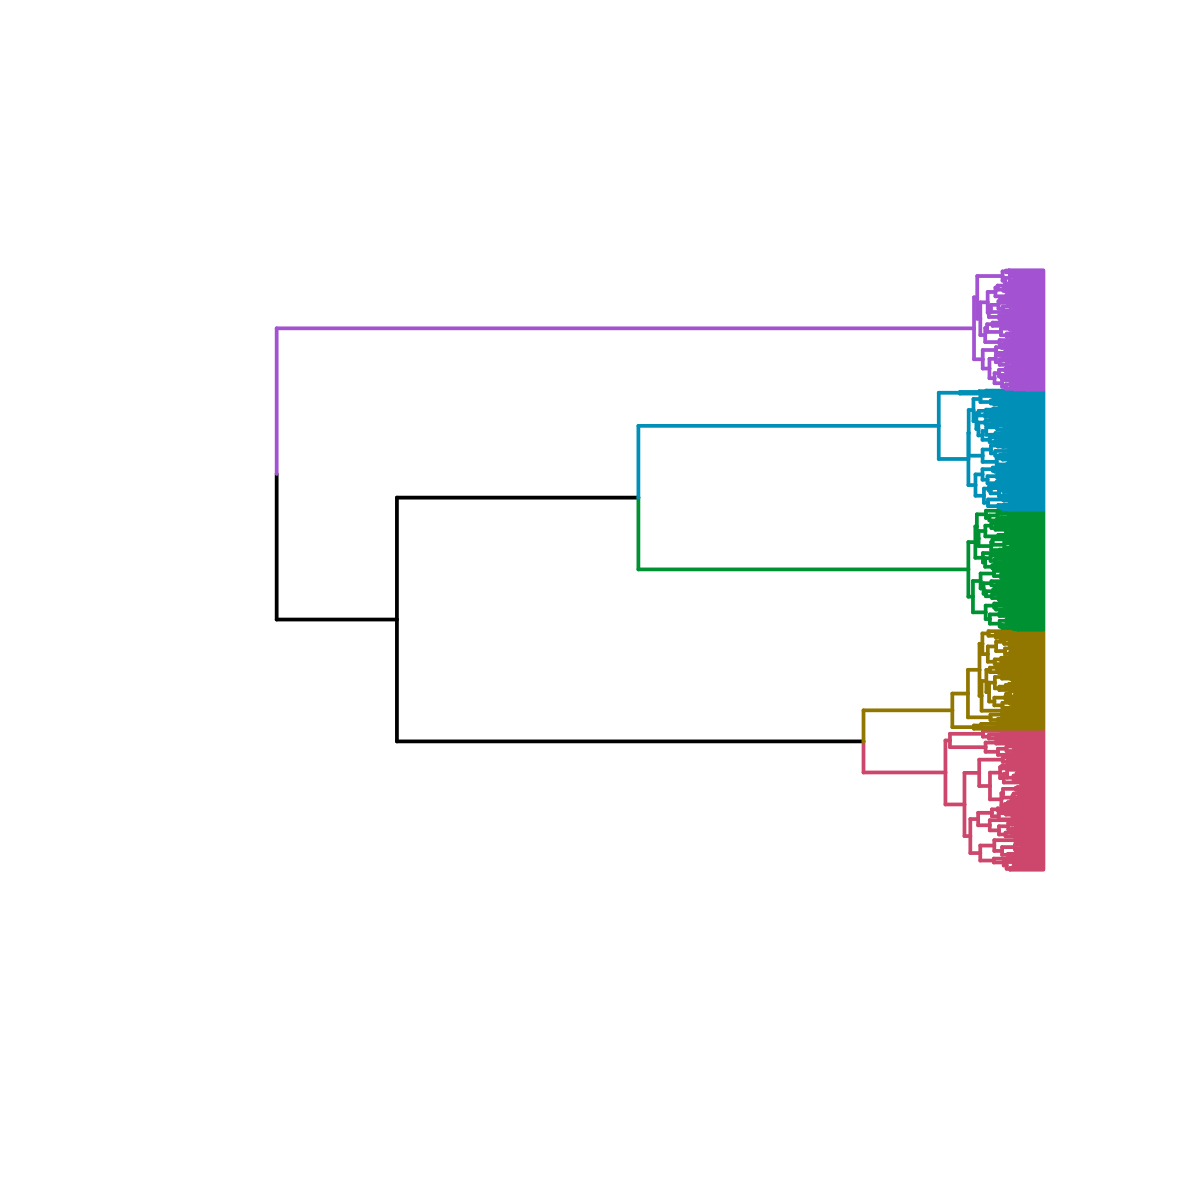

Loading required package: vegan

Loading required package: permute


Attaching package: ‘permute’


The following object is masked from ‘package:dendextend’:

    shuffle


Loading required package: lattice

Registered S3 method overwritten by 'vegan':
  method     from      
  rev.hclust dendextend

This is vegan 2.5-6

Warning message in rgl.init(initValue, onlyNULL):
“RGL: unable to open X11 display”
Warning message:
“'rgl.init' failed, running with 'rgl.useNULL = TRUE'.”


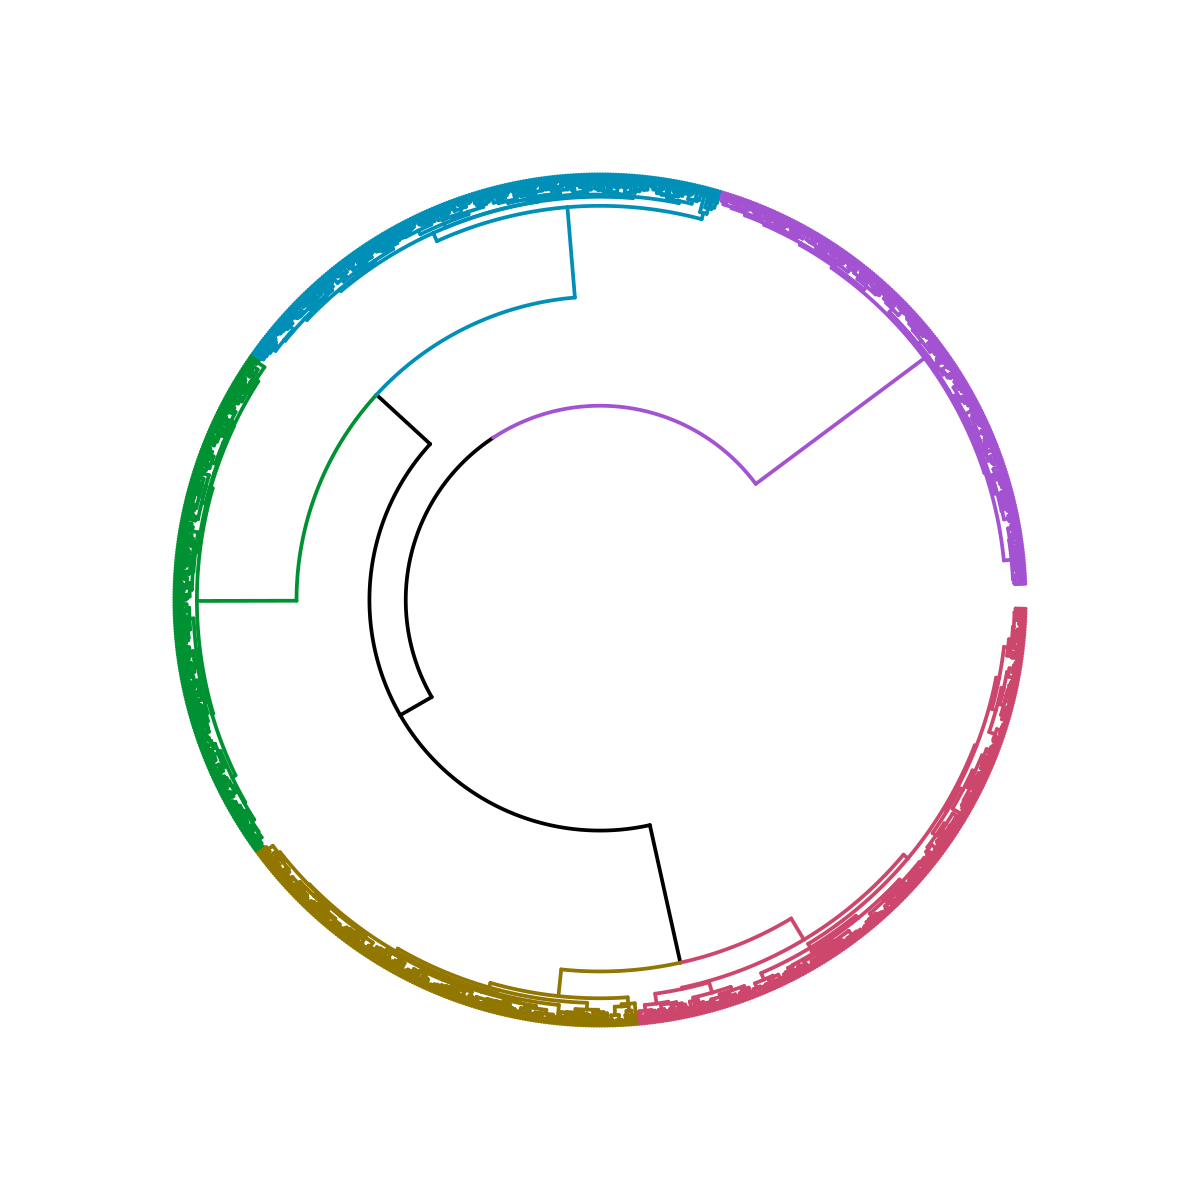

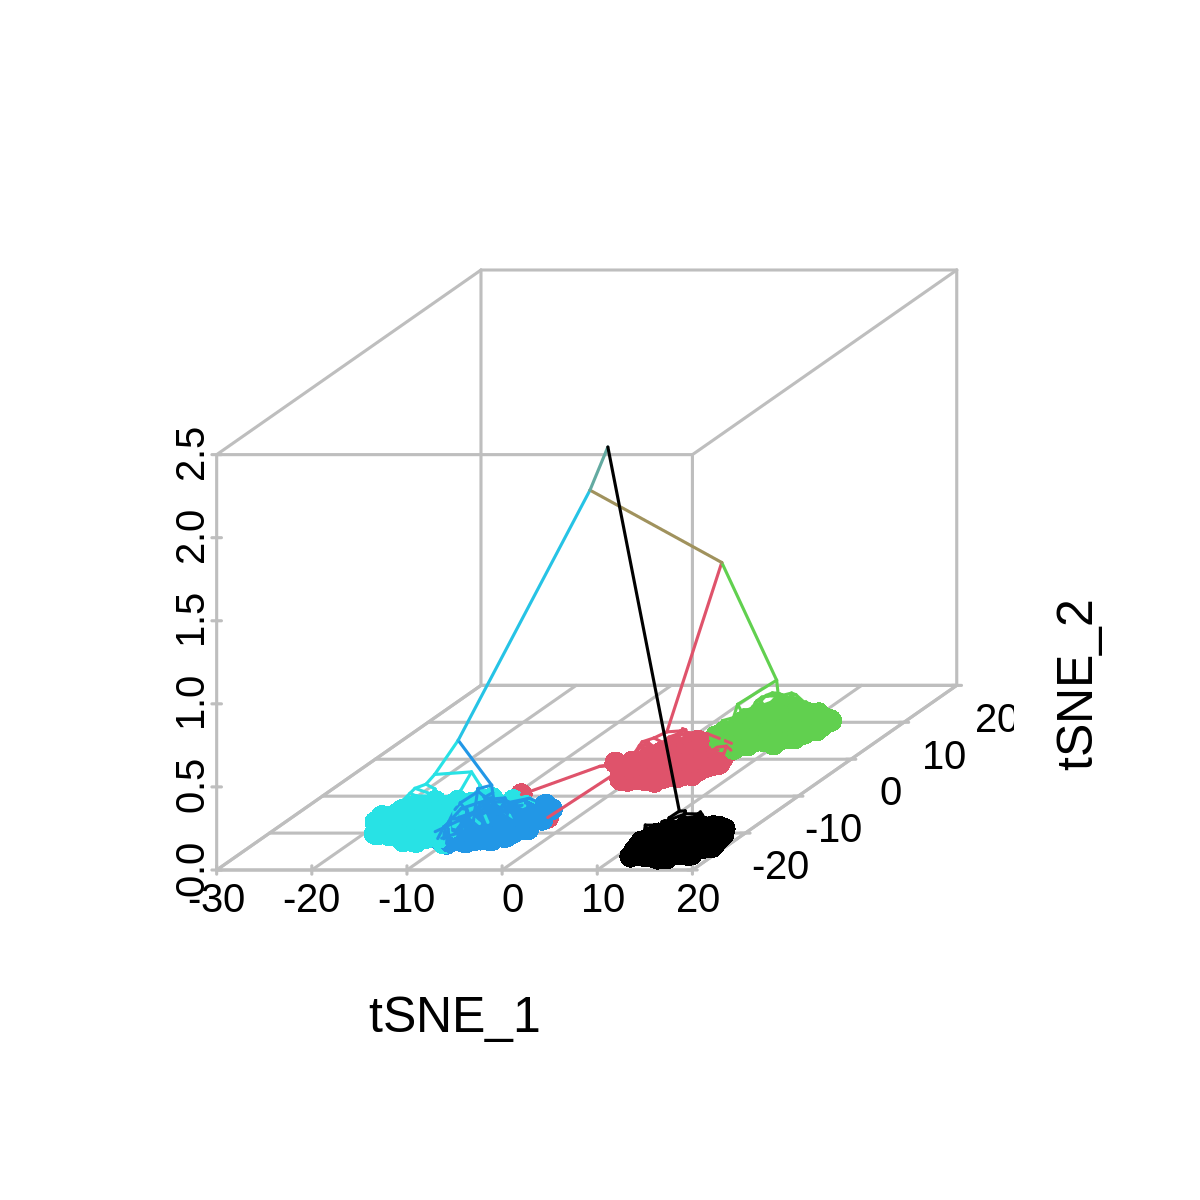

In [6]:
## There are some available shapes of dendrograms.(Optional)

options(repr.plot.width=4, repr.plot.height=4, repr.plot.res = 300)

# Rotate the tree and remove the axis
dend <- clus.dendrogram %>% 
    set("branches_k_color", k=5) %>% 
    set("branches_lwd", 1.2) %>% 
    set("labels_colors", "white")
plot(dend, horiz = TRUE, axes=FALSE)

# Plot the tree like a circle with the help of cirzlize package
library(circlize)
circlize_dendrogram(dend)

# Plot 3D tree structure with R package vegan3d
library(vegan3d)
par(col.axis = "grey") # please read the vignette of R package scatterplot3d for the parameters
orditree3d(ord = data.d4.seuratobj@reductions$tsne@cell.embeddings, cluster = clus.tree, pch=16, col = dendextend::cutree(clus.tree, 5))

# The plotting could run in the ggplot2 environment with the function as.ggdend.
# Please visit the offical websites and vignettes for more detailed introduction.

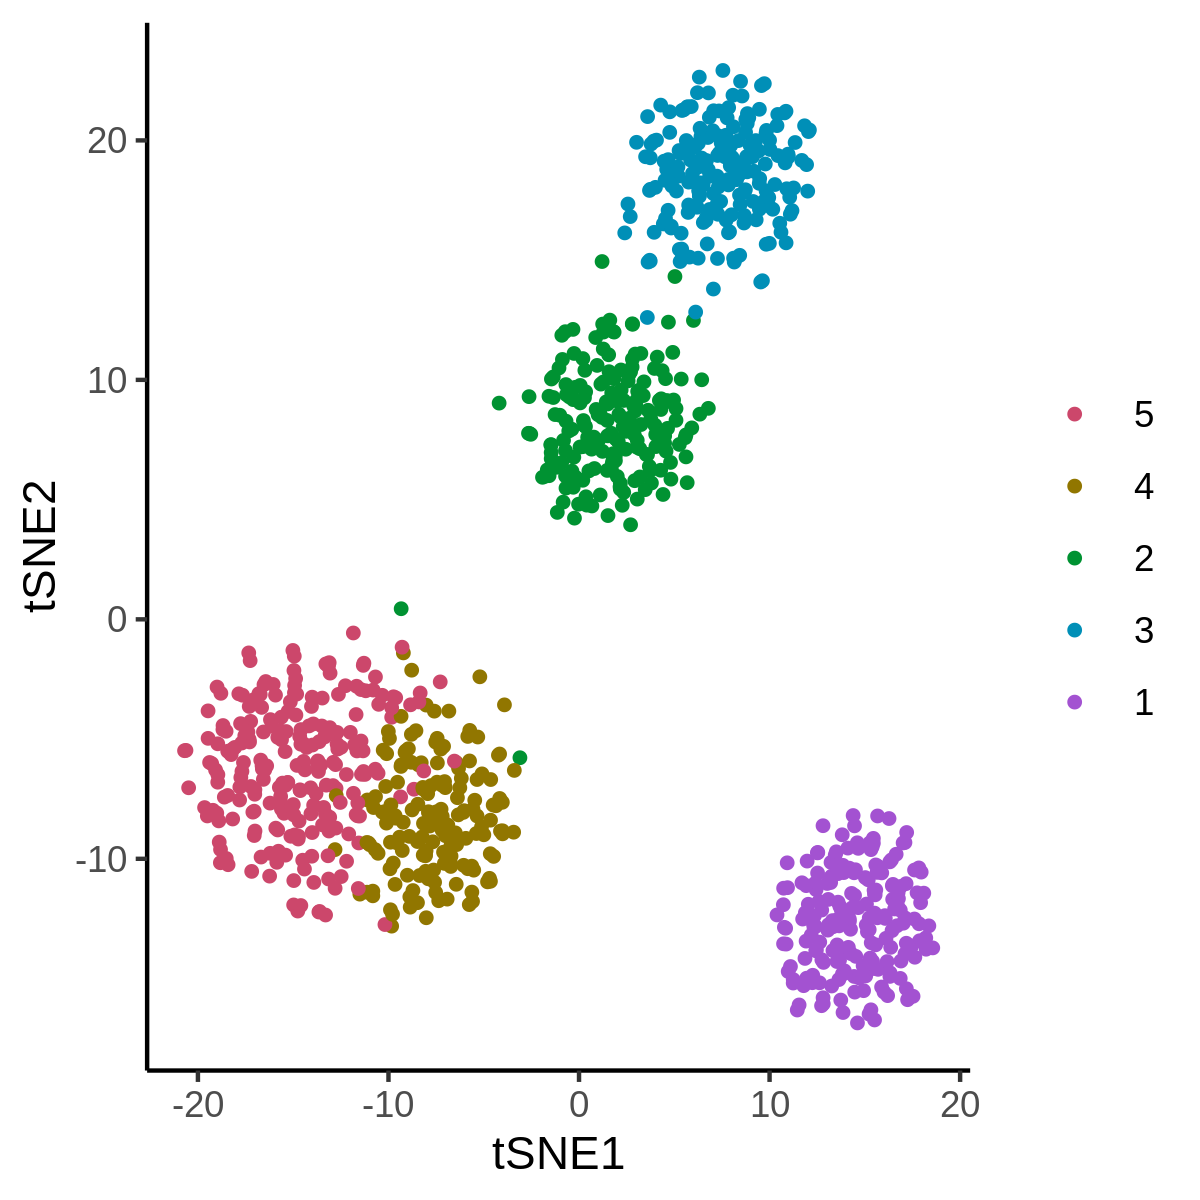

In [8]:
## Visualizing the scRNA-seq data with tSNE plot

options(repr.plot.width=4, repr.plot.height=4, repr.plot.res = 300)
# The tSNE coordinates are calculated by the Seurat package
k=5

# reorder the clusters
# We do not know why not the function cutree names the clusters according to their order from left to right in the dendrogram, and we need to adjust it artifically.
reorder.clusters = factor(cutree(clus.tree, k), levels = unique(cutree(clus.tree, k)[clus.tree$order]))

plot.df <- data.frame(tSNE1 = data.d4.seuratobj@reductions$tsne@cell.embeddings[,1],
                     tSNE2 = data.d4.seuratobj@reductions$tsne@cell.embeddings[,2],
                     Clusters = reorder.clusters)

ggplot(plot.df, aes(x=tSNE1, y=tSNE2, colour=Clusters)) + geom_point(size = 1.0) + theme(legend.title = element_blank()) + 
    scale_color_manual(values = colorspace::rainbow_hcl(k, c = 90, l = 50))
# Using the rainbow_hcl to get the same colours as the dendrogram.

### Changing the colours for both the dendrogram and the tSNE plot

In some situations, the users may want to set the colours artifically. And here we give an instance.

[1] "#F8766D" "#A3A500" "#00BF7D" "#00B0F6" "#E76BF3"

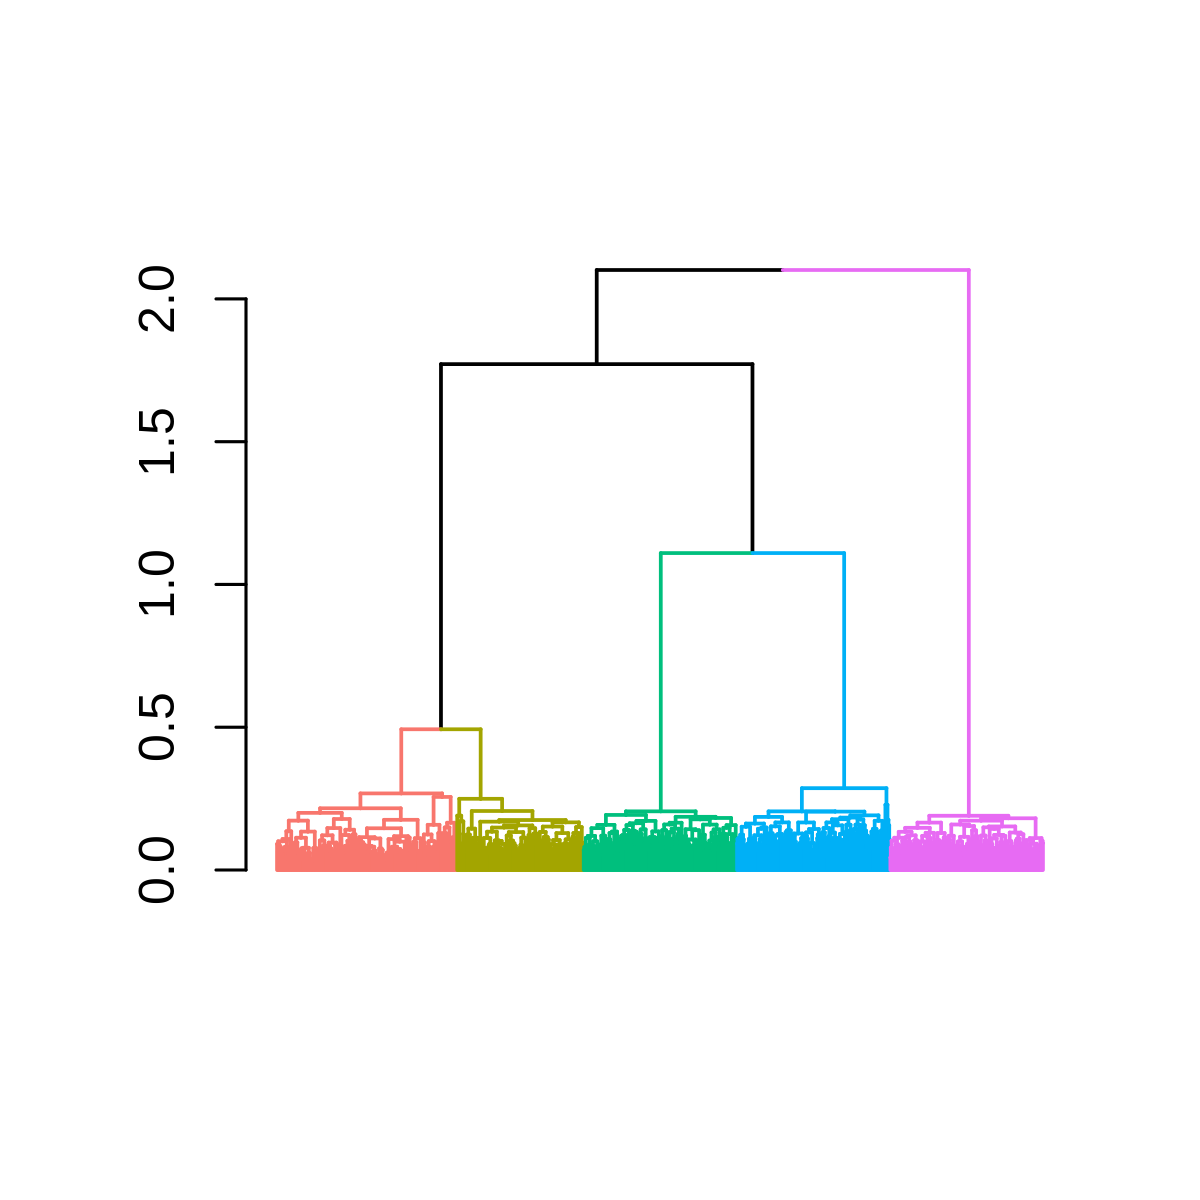

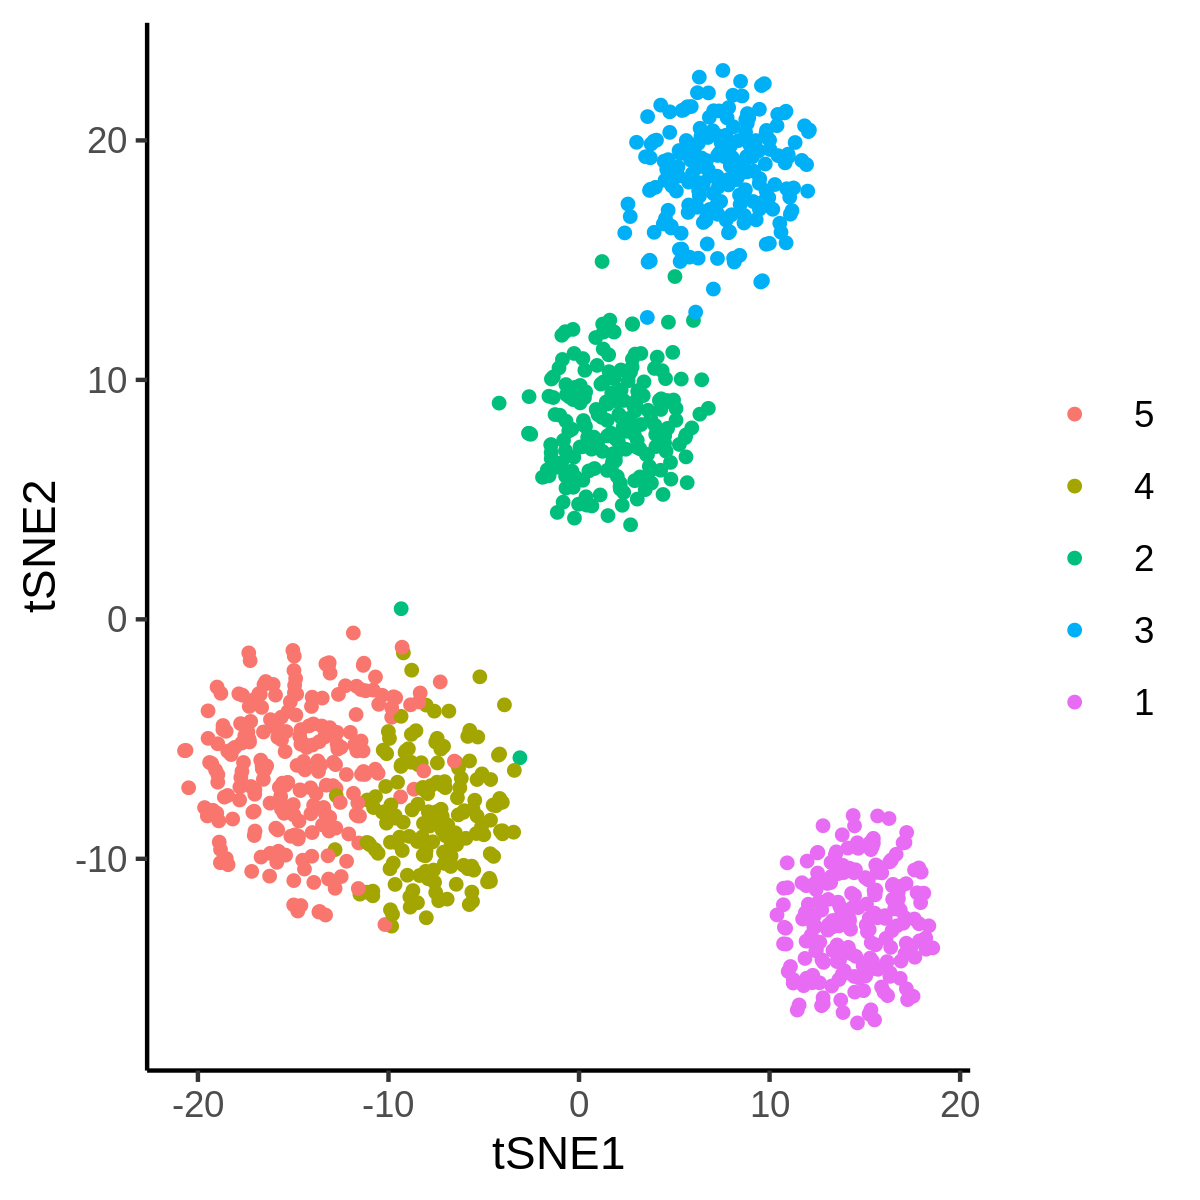

In [9]:
## Use the colour bar from ggplot2 default as an instance.

# load the colour bar
col.bar = color.ggplot(5)
col.bar

# plot dendrogram
options(repr.plot.width=4, repr.plot.height=4, repr.plot.res = 300)

dend <- clus.dendrogram %>% set("branches_k_color", k=5, value=col.bar) %>% set("branches_lwd", 1.2) %>% set("labels_colors", "white")
plot(dend)

# plot tSNE
k=5
reorder.clusters = factor(cutree(clus.tree, k), levels = unique(cutree(clus.tree, k)[clus.tree$order]))
plot.df <- data.frame(tSNE1 = data.d4.seuratobj@reductions$tsne@cell.embeddings[,1],
                     tSNE2 = data.d4.seuratobj@reductions$tsne@cell.embeddings[,2],
                     Clusters = reorder.clusters)
ggplot(plot.df, aes(x=tSNE1, y=tSNE2, colour=Clusters)) + geom_point(size = 1.0) + theme(legend.title = element_blank()) + 
    scale_color_manual(values = col.bar)

### Plot dendrogram with extra colour bars

There is always some prior knowledge about the cells. The information could be given categories, or the values of different features. The *dendextend* could show them as colour bars beside the leaves in the dendrogram. Here we add a colour bar to represent the given annotation by the simulation dataset.

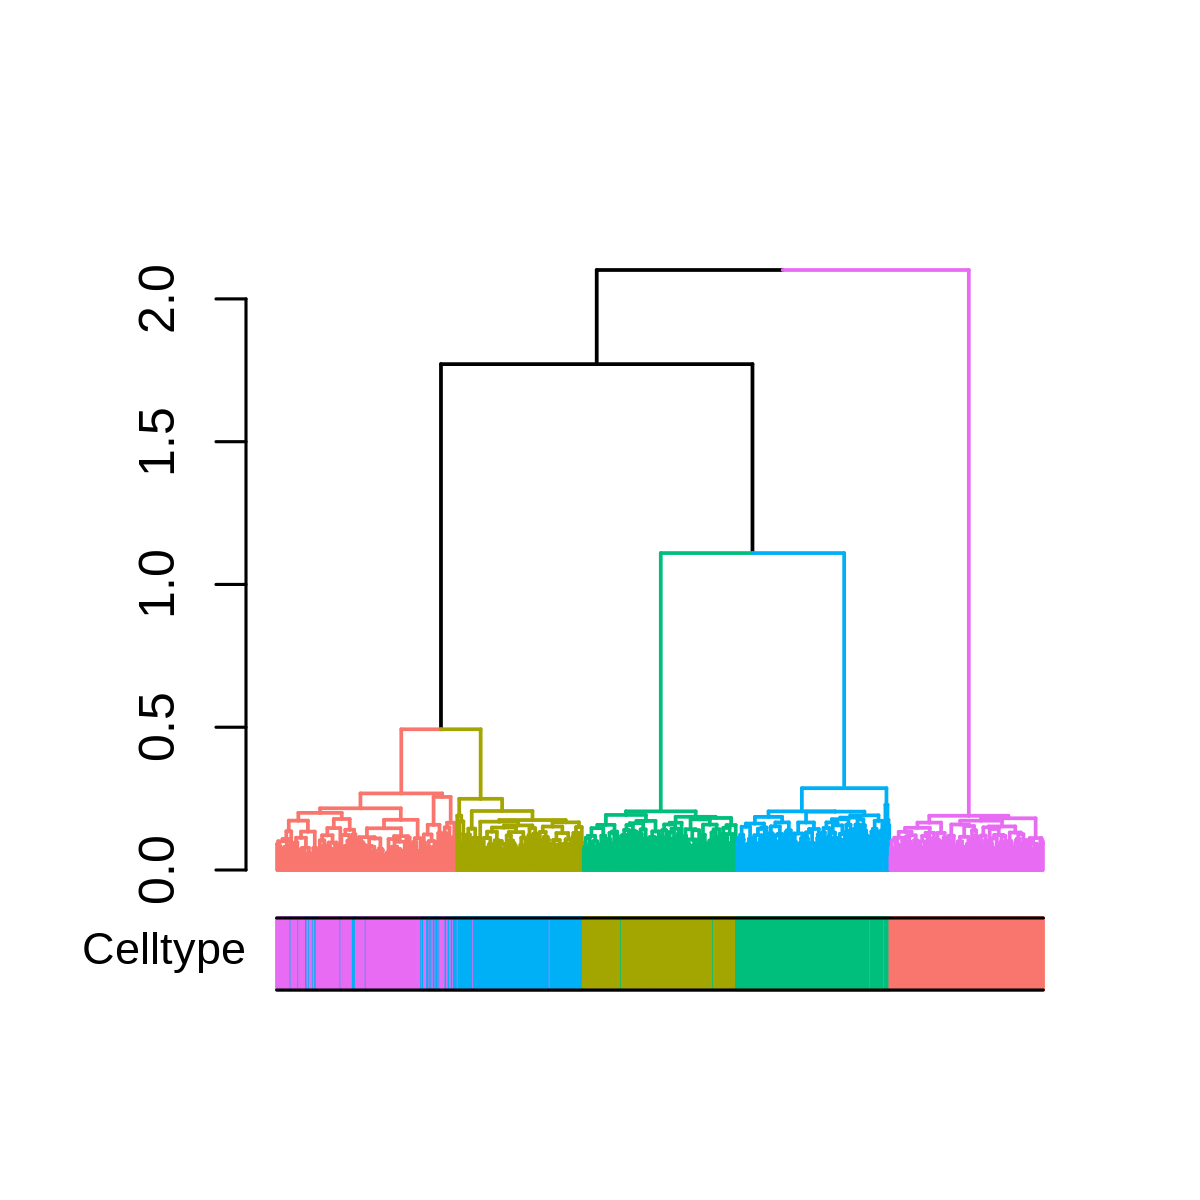

In [11]:
## Preparing the data matrix for the colour bar

# The colours used in the bar
colourbar1 <- color.ggplot(5)

# The matrix which records the colour of each cell according to the given label
extra.colourbar <- matrix(nrow = 1000, ncol = 1)
colnames(extra.colourbar) = 'Celltype'

# Filling the matrix
extra.colourbar[which(data.d4.seuratobj$cell.type == 1),1] = colourbar1[1]
extra.colourbar[which(data.d4.seuratobj$cell.type == 2),1] = colourbar1[2]
extra.colourbar[which(data.d4.seuratobj$cell.type == 3),1] = colourbar1[3]
extra.colourbar[which(data.d4.seuratobj$cell.type == 4),1] = colourbar1[4]
extra.colourbar[which(data.d4.seuratobj$cell.type == 5),1] = colourbar1[5]

## Plot
options(repr.plot.width=4, repr.plot.height=4, repr.plot.res = 300)

dend <- clus.dendrogram %>% set("branches_k_color", k=5, value=col.bar) %>% set("branches_lwd", 1.2) %>% set("labels_colors", "white")
plot(dend)
colored_bars(colors = extra.colourbar,dend = dend, y_shift = -0.08*max(clus.tree$height), text_shift = 0, sort_by_labels_order = T,y_scale = 0.12*max(clus.tree$height))
# y_shift: the parameter related with the distance from the colour bar to the dendrogram
# y_scale: the height of the colour bar